**Import Libraries**

In [ ]:
import torch
import numpy as np
import torch.nn as nn

***VGG*** 
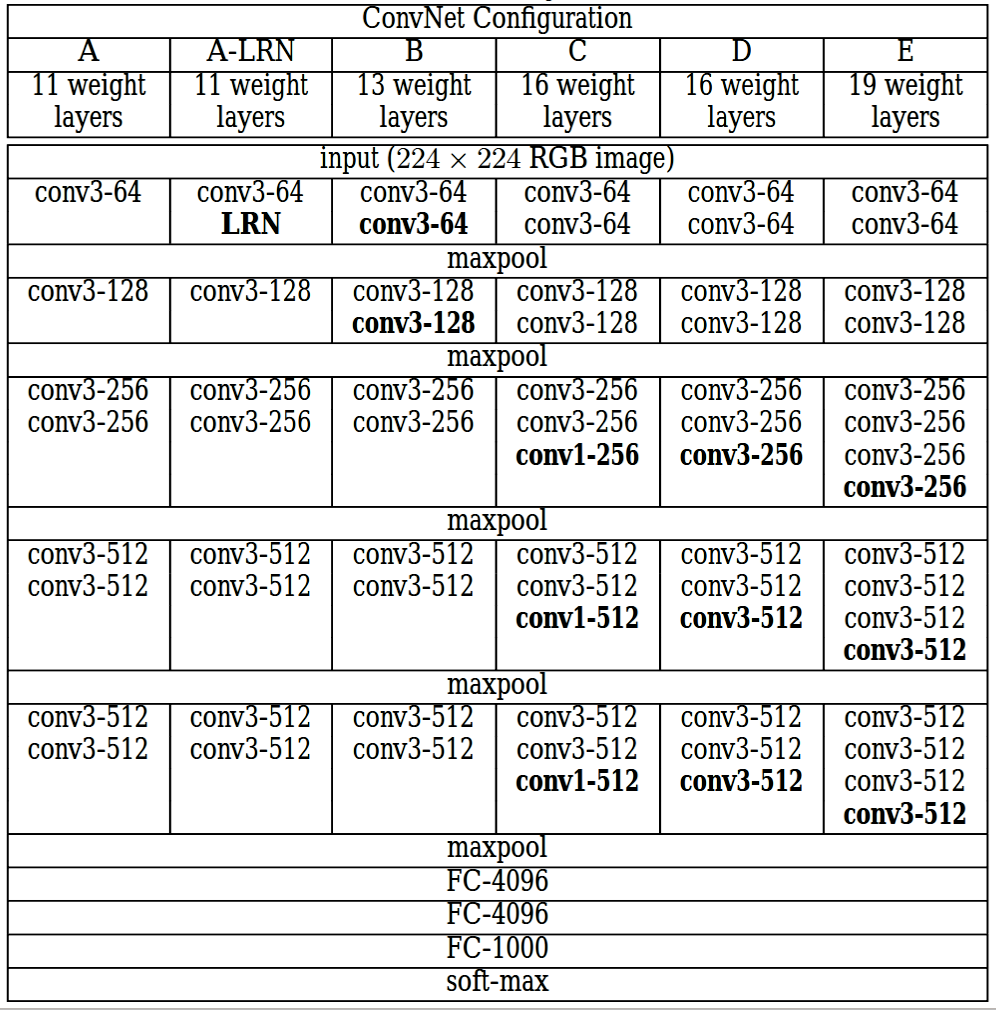


In [ ]:
Vgg_arch = [
64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']

In [ ]:
class VGG19(nn.Module):
  def __init__(self):
    super().__init__()
    self.in_channels = 3
    self.num_classes = 1000
    self.model = self.create_model(Vgg_arch)
    self.fcs = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, self.num_classes)
            )

  def forward(self,x):
    x = self.model(x)
    x= x.reshape(x.shape[0],-1)
    print(x.shape)
    x = self.fcs(x)
    return x

  def create_model(self,arch):
    layers = []
    in_channels = self.in_channels

    for x in arch:
      if type(x) == int:
        out_channels = x
        layers += [
                   nn.Conv2d(in_channels=in_channels,out_channels=out_channels,
                                     kernel_size=(3,3), stride=(1,1), padding=(1,1)),
                   nn.BatchNorm2d(x),
                   nn.ReLU()]
        in_channels = x

      elif x == "M":
        layers +=[
                  nn.MaxPool2d(2,2)
        ]

    return nn.Sequential(*layers)

In [ ]:
x = torch.randn(3, 3, 224, 224)
model = VGG19()
model(x)

torch.Size([3, 25088])


tensor([[-0.5527, -0.2066, -0.0562,  ..., -0.0261, -0.0317, -0.2433],
        [-0.0845, -0.3115,  0.1095,  ...,  0.2749, -0.0634, -0.0227],
        [-0.2380,  0.0372, -0.0390,  ...,  0.1237, -0.3375, -0.4232]],
       grad_fn=<AddmmBackward0>)